In [ ]:
!gdown --id 1vS5vRtoz3rSQmmeu8ZpIynFS6G3soKMO

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1vS5vRtoz3rSQmmeu8ZpIynFS6G3soKMO
To: /content/Catastro_TestData.csv
100% 334k/334k [00:00<00:00, 14.9MB/s]


    longitud   latitud        precio  municipio  departamento  habitaciones  \
0 -74.051980  4.760780  4.300000e+08    11001.0          11.0           3.0   
1 -75.373938  6.153550  4.400000e+08     5615.0           5.0           3.0   
2 -74.033000  4.690000  4.600000e+09    11001.0          11.0           3.0   
3 -74.047010  4.761164  4.050000e+08    11001.0          11.0           3.0   
4 -74.072340  4.714599  4.550000e+08    11001.0          11.0           3.0   

   baños  estrato  area_total  area_construida  ...  supermarket_dist  \
0    2.0      3.0       336.0            168.0  ...              0.44   
1    2.0      5.0        88.0             88.0  ...              0.72   
2    3.0      6.0       616.0            308.0  ...              0.66   
3    3.0      4.0       210.0            105.0  ...              0.31   
4    2.0      4.0        87.0             87.0  ...              0.39   

   bus stop_dist  ATM_dist  police_dist  convenience store_dist  laundry_dist  \
0    

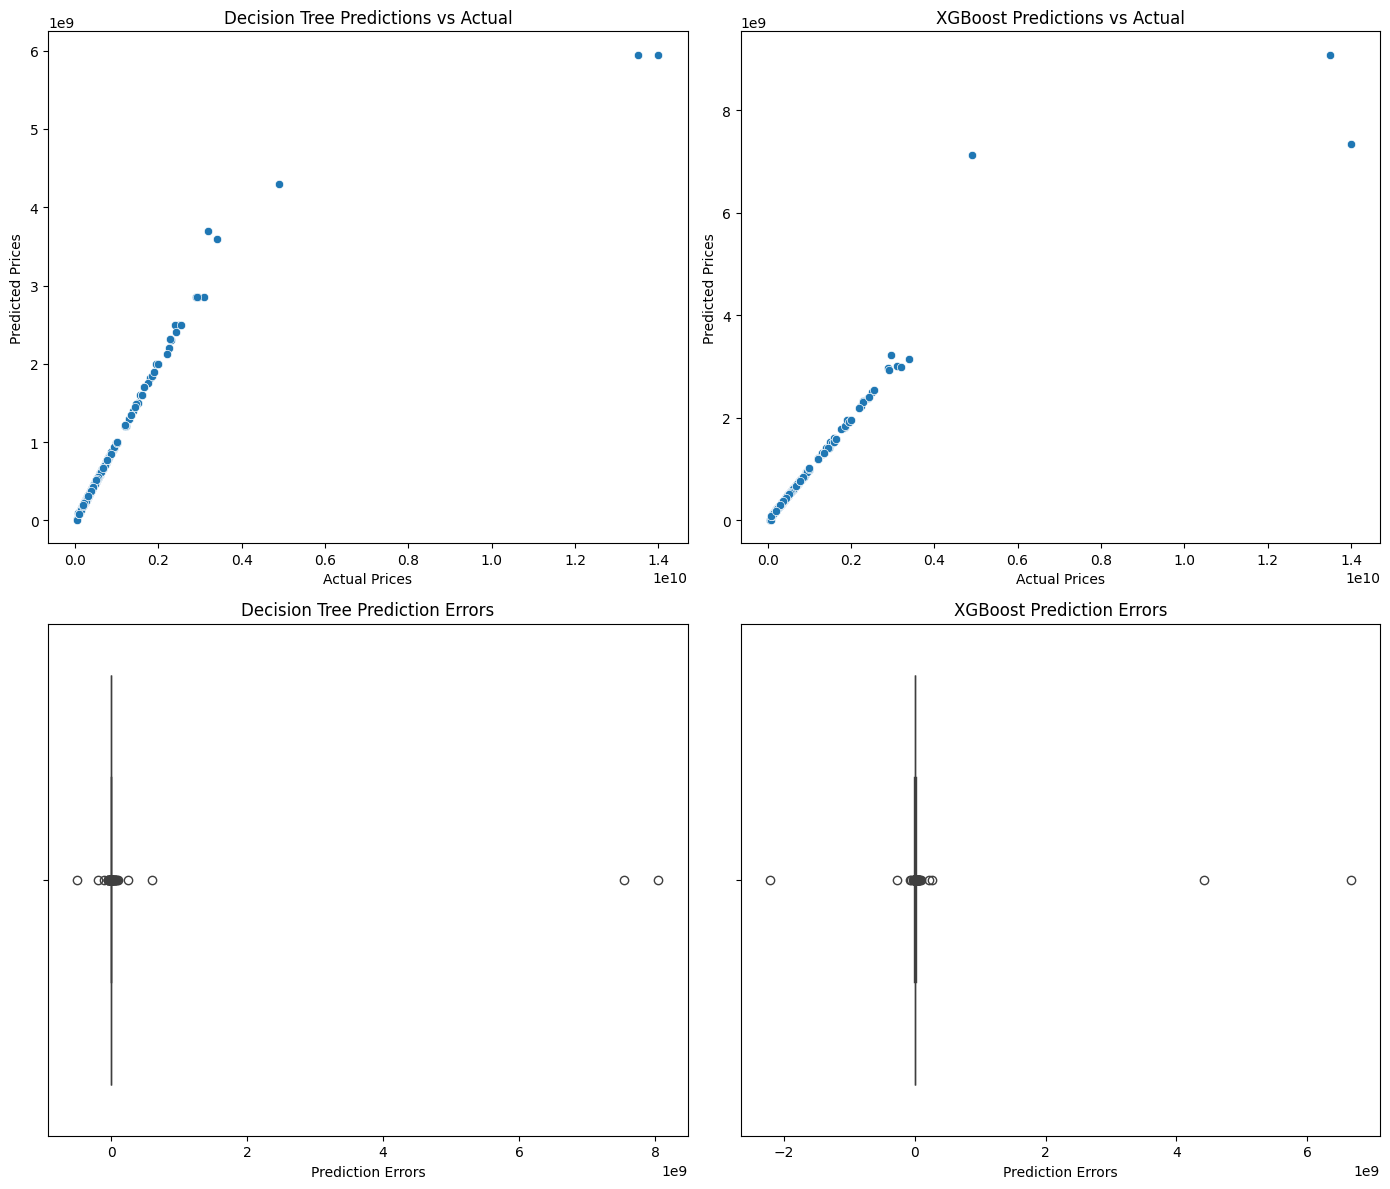


Resumen del rendimiento de los modelos:


,Model,MSE,R2
0,Decision Tree,3.866783e+17,0.739549
1,XGBoost,2.183362e+17,0.852937


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import seaborn as sns

# Cargar datos
file_path = 'Catastro_TestData.csv'
data = pd.read_csv(file_path)

# Mostrar las primeras filas de los datos para entender su estructura
print(data.head())

# Usar la columna 'precio' como la etiqueta (target)
X = data.drop(columns=['precio'])  # Todas las columnas menos 'precio'
y = data['precio']  # Columna 'precio'

# Imputar valores faltantes en las características
imputer_X = SimpleImputer(strategy='mean')
X = imputer_X.fit_transform(X)

# Imputar valores faltantes en las etiquetas
imputer_y = SimpleImputer(strategy='mean')
y = imputer_y.fit_transform(y.values.reshape(-1, 1)).ravel()

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo Decision Tree
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Evaluar el modelo Decision Tree
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f"Decision Tree MSE: {mse_dt}")
print(f"Decision Tree R2: {r2_dt}")

# Modelo XGBoost
xgb_model = XGBRegressor(objective='reg:squarederror')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluar el modelo XGBoost
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost MSE: {mse_xgb}")
print(f"XGBoost R2: {r2_xgb}")

# Visualización de comparación de rendimiento
fig, ax = plt.subplots(2, 2, figsize=(14, 12))

# Gráfico de dispersión para Decision Tree
sns.scatterplot(x=y_test, y=y_pred_dt, ax=ax[0, 0])
ax[0, 0].set_title('Decision Tree Predictions vs Actual')
ax[0, 0].set_xlabel('Actual Prices')
ax[0, 0].set_ylabel('Predicted Prices')

# Gráfico de dispersión para XGBoost
sns.scatterplot(x=y_test, y=y_pred_xgb, ax=ax[0, 1])
ax[0, 1].set_title('XGBoost Predictions vs Actual')
ax[0, 1].set_xlabel('Actual Prices')
ax[0, 1].set_ylabel('Predicted Prices')

# Boxplot de errores para Decision Tree
errors_dt = y_test - y_pred_dt
sns.boxplot(x=errors_dt, ax=ax[1, 0])
ax[1, 0].set_title('Decision Tree Prediction Errors')
ax[1, 0].set_xlabel('Prediction Errors')

# Boxplot de errores para XGBoost
errors_xgb = y_test - y_pred_xgb
sns.boxplot(x=errors_xgb, ax=ax[1, 1])
ax[1, 1].set_title('XGBoost Prediction Errors')
ax[1, 1].set_xlabel('Prediction Errors')

plt.tight_layout()
plt.show()

# Reporte resumido
report = pd.DataFrame({
    'Model': ['Decision Tree', 'XGBoost'],
    'MSE': [mse_dt, mse_xgb],
    'R2': [r2_dt, r2_xgb]
})

print("\nResumen del rendimiento de los modelos:")
report